# Fixing compression + sparse outliers

There was a problem when compression was used with sparsity, where `bits_per_param` was under-reported, since `count_bits_tensor` for `Q.SparseFormat` didn't properly remove sparse outliers before passing onto the wrapped `format`. This notebook contains after-the-fix results.

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
from typing import Any
from torch import tensor

import block_formats.experiments as E

matplotlib.rcParams.update({"axes.spines.top": False, "axes.spines.right": False, "legend.frameon": False})

In [3]:
runs = E.runs("20250429-compress-sparse-v3")

In [4]:
def get_row(run: dict[str, Any]) -> dict[str, Any]:
    fmt = run.config.test.fmt
    return dict(
        element_bits=fmt.element_bits,
        scaling=fmt.scaling,
        block={(None, None): "tensor", (1, None): "channel"}.get(tuple(fmt.block_shape), fmt.block_shape[1]),
        sparse_ratio=fmt.sparse_ratio,
        bits_per_param=run.summary.bits_per_param,
        kl_div=tensor(run.summary.kl_div).mean().item(),
    )

df = pd.DataFrame.from_records(list(map(get_row, runs)))
df.head()

,element_bits,scaling,block,sparse_ratio,bits_per_param,kl_div
0,3.0,rms,tensor,0.000000,3.013660,0.311216
1,3.0,rms,tensor,0.000977,3.042086,0.316305
2,3.0,rms,tensor,0.007812,3.446432,0.268134
3,3.0,rms,channel,0.000000,3.016144,0.255417
4,3.0,rms,channel,0.000977,3.040395,0.255558


## Sparsity doesn't help when using compression

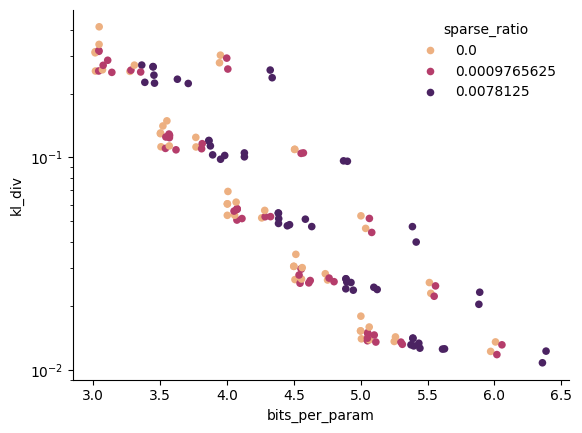

In [ ]:
ax = sns.scatterplot(
    data=df, y="kl_div", x="bits_per_param", lw=0, s=30,
    hue="sparse_ratio", hue_norm=matplotlib.colors.SymLogNorm(2**-10), palette="flare"
)
ax.set_yscale("log");

## Small blocks are also wasteful

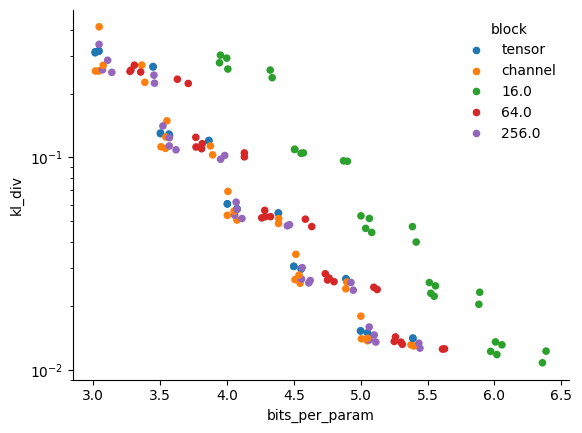

In [ ]:
ax = sns.scatterplot(
    data=df, y="kl_div", x="bits_per_param", lw=0, s=30, hue="block",
)
ax.set_yscale("log");